In [ ]:
#importing libraries 
import numpy as np 
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Loading the Dataset
data = pd.read_csv('forecast.csv', sep=',')
data.head() 

,YEAR,Annual,Jan-Feb,Mar-May,Jun-Sept,Oct-Dec,Annual_mavg,Jan_mavg,Mar_mavg,Jun_mavg,Oct_mavg
0,1878,26.775000,23.90,28.133333,27.475,26.400000,NaN,NaN,NaN,NaN,NaN
1,1879,26.041667,24.05,27.333333,26.825,25.033333,NaN,NaN,NaN,NaN,NaN
2,1880,26.608333,23.45,28.333333,26.875,26.633333,NaN,NaN,NaN,NaN,NaN
3,1881,26.883333,25.15,28.066667,27.300,26.300000,NaN,NaN,NaN,NaN,NaN
4,1882,26.300000,24.45,27.733333,26.650,25.633333,26.521667,24.2,27.92,27.025,26.0


In [ ]:
#dropping missing values in mavg columns'
data=data.dropna(how='any')
data.head()

,YEAR,Annual,Jan-Feb,Mar-May,Jun-Sept,Oct-Dec,Annual_mavg,Jan_mavg,Mar_mavg,Jun_mavg,Oct_mavg
4,1882,26.300000,24.45,27.733333,26.650,25.633333,26.521667,24.20,27.920000,27.025,26.000000
5,1883,26.100000,23.95,27.566667,26.725,25.233333,26.386667,24.21,27.806667,26.875,25.766667
6,1884,26.075000,22.85,27.366667,27.075,25.600000,26.393333,23.97,27.813333,26.925,25.880000
7,1885,26.275000,22.80,26.966667,27.450,26.333333,26.326667,23.84,27.540000,27.040,25.820000
8,1886,26.416667,23.30,27.833333,27.200,26.033333,26.233333,23.47,27.493333,27.020,25.766667


In [ ]:
data.shape

(138, 11)

In [ ]:
data.isnull().sum()

YEAR           0
Annual         0
Jan-Feb        0
Mar-May        0
Jun-Sept       0
Oct-Dec        0
Annual_mavg    0
Jan_mavg       0
Mar_mavg       0
Jun_mavg       0
Oct_mavg       0
dtype: int64

In [ ]:
data.columns.values

array(['YEAR', 'Annual', 'Jan-Feb', 'Mar-May', 'Jun-Sept', 'Oct-Dec',
       'Annual_mavg', 'Jan_mavg', 'Mar_mavg', 'Jun_mavg', 'Oct_mavg'],
      dtype=object)

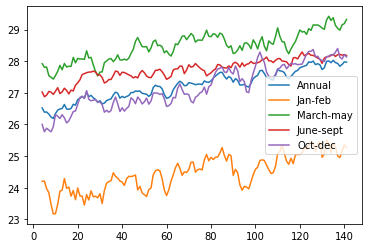

In [ ]:
line1=data['Annual_mavg'].plot()
line2=data['Jan_mavg'].plot()
line3=data['Mar_mavg'].plot()
line4=data['Jun_mavg'].plot()
line5=data['Oct_mavg'].plot()
plt.legend(['Annual','Jan-feb','March-may','June-sept','Oct-dec'])



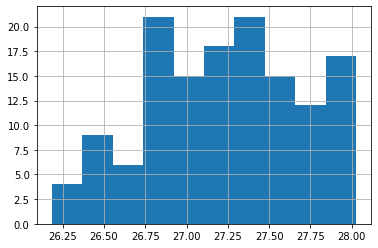

In [ ]:
#summary stats- checking mean and variance by plotting hist
data['Annual_mavg'].hist()

In [ ]:
sample_check=data['Annual_mavg'].values

In [ ]:
split = round(len(sample_check) / 2)
sample_check1, sample_check2 = sample_check[0:split], sample_check[split:]
mean1, mean2 = sample_check1.mean(), sample_check2.mean()
var1, var2 = sample_check1.var(), sample_check2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=26.860471, mean2=27.608631
variance1=0.081734, variance2=0.060946


In [ ]:
#Calculating ADF TEST via p-value interpretation
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
result = adfuller(sample_check)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.078482
p-value: 0.723576
Critical Values:
	1%: -3.483
	5%: -2.885
	10%: -2.579


In [ ]:
pip install statsmodels

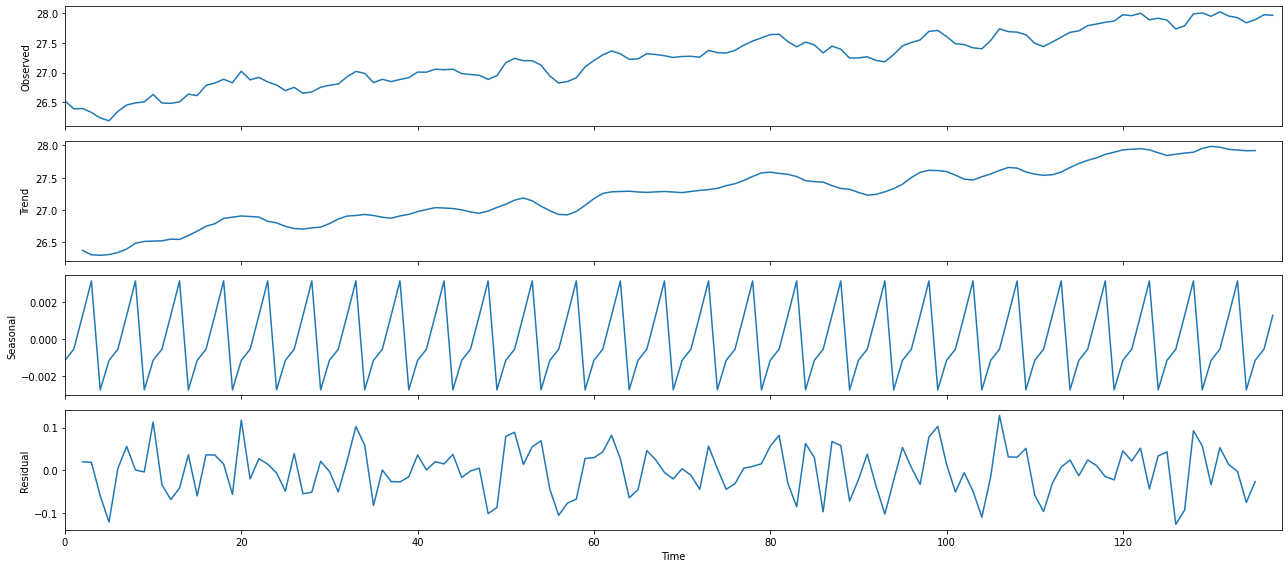

In [ ]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
sample_check=data['Annual_mavg'].values
decomposition =sm.tsa.seasonal_decompose(sample_check, model='additive',freq=5)
fig = decomposition.plot()
plt.show()

In [ ]:
#parameters selection for ARIMA
import itertools 
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2],12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))




Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
#fitting arima model on annual mavg column
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(sample_check,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12- AIC:{}'.format(param, param_seasonal, results.aic))
            
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12- AIC:1296.309382893793
ARIMA(0, 0, 0)x(0, 0, 1, 12)12- AIC:1052.4235828699072
ARIMA(0, 0, 0)x(0, 1, 0, 12)12- AIC:9.368840650942388
ARIMA(0, 0, 0)x(0, 1, 1, 12)12- AIC:-12.257093433083444
ARIMA(0, 0, 0)x(1, 0, 0, 12)12- AIC:-40.008612917967106
ARIMA(0, 0, 0)x(1, 0, 1, 12)12- AIC:-99.33541008738071
ARIMA(0, 0, 0)x(1, 1, 0, 12)12- AIC:-11.517651073785487
ARIMA(0, 0, 0)x(1, 1, 1, 12)12- AIC:-10.257051619240336
ARIMA(0, 0, 1)x(0, 0, 0, 12)12- AIC:1106.3824417316682
ARIMA(0, 0, 1)x(0, 0, 1, 12)12- AIC:879.033433549483
ARIMA(0, 0, 1)x(0, 1, 0, 12)12- AIC:-103.24372004254619
ARIMA(0, 0, 1)x(0, 1, 1, 12)12- AIC:-110.7921825195466


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 1)x(1, 0, 0, 12)12- AIC:-35.80532861285145


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 1)x(1, 0, 1, 12)12- AIC:-21.2030535266186
ARIMA(0, 0, 1)x(1, 1, 0, 12)12- AIC:-111.43052884321197
ARIMA(0, 0, 1)x(1, 1, 1, 12)12- AIC:-110.68764636032498
ARIMA(0, 1, 0)x(0, 0, 0, 12)12- AIC:-282.2725258059022
ARIMA(0, 1, 0)x(0, 0, 1, 12)12- AIC:-255.86785258021348
ARIMA(0, 1, 0)x(0, 1, 0, 12)12- AIC:-170.00809467080254
ARIMA(0, 1, 0)x(0, 1, 1, 12)12- AIC:-206.8741578353027
ARIMA(0, 1, 0)x(1, 0, 0, 12)12- AIC:-258.7793598258834
ARIMA(0, 1, 0)x(1, 0, 1, 12)12- AIC:-257.7693720308996


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 0)x(1, 1, 0, 12)12- AIC:-184.65042682527144
ARIMA(0, 1, 0)x(1, 1, 1, 12)12- AIC:-198.24810105395107
ARIMA(0, 1, 1)x(0, 0, 0, 12)12- AIC:-281.4213158441471
ARIMA(0, 1, 1)x(0, 0, 1, 12)12- AIC:-257.0945052379026
ARIMA(0, 1, 1)x(0, 1, 0, 12)12- AIC:-175.3817966533949
ARIMA(0, 1, 1)x(0, 1, 1, 12)12- AIC:-209.33185333244845
ARIMA(0, 1, 1)x(1, 0, 0, 12)12- AIC:-260.85426401304363
ARIMA(0, 1, 1)x(1, 0, 1, 12)12- AIC:-264.0396185069117
ARIMA(0, 1, 1)x(1, 1, 0, 12)12- AIC:-194.36568737445552
ARIMA(0, 1, 1)x(1, 1, 1, 12)12- AIC:-198.77172729770186
ARIMA(1, 0, 0)x(0, 0, 0, 12)12- AIC:-282.9032369335381
ARIMA(1, 0, 0)x(0, 0, 1, 12)12- AIC:-259.5891777018501


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 0)x(0, 1, 0, 12)12- AIC:-176.24224846613126
ARIMA(1, 0, 0)x(0, 1, 1, 12)12- AIC:-208.38276600143993
ARIMA(1, 0, 0)x(1, 0, 0, 12)12- AIC:-259.3568779591814
ARIMA(1, 0, 0)x(1, 0, 1, 12)12- AIC:-260.03253108661886
ARIMA(1, 0, 0)x(1, 1, 0, 12)12- AIC:-187.92722407353688
ARIMA(1, 0, 0)x(1, 1, 1, 12)12- AIC:-200.02940047867904
ARIMA(1, 0, 1)x(0, 0, 0, 12)12- AIC:-284.3559086676155
ARIMA(1, 0, 1)x(0, 0, 1, 12)12- AIC:-257.69792602224214
ARIMA(1, 0, 1)x(0, 1, 0, 12)12- AIC:-187.43241942616322
ARIMA(1, 0, 1)x(0, 1, 1, 12)12- AIC:-211.9559526095738
ARIMA(1, 0, 1)x(1, 0, 0, 12)12- AIC:-260.65857495106366
ARIMA(1, 0, 1)x(1, 0, 1, 12)12- AIC:-265.98182151995366
ARIMA(1, 0, 1)x(1, 1, 0, 12)12- AIC:-200.7796548478161
ARIMA(1, 0, 1)x(1, 1, 1, 12)12- AIC:-201.97341085181284
ARIMA(1, 1, 0)x(0, 0, 0, 12)12- AIC:-284.29442943999175
ARIMA(1, 1, 0)x(0, 0, 1, 12)12- AIC:-257.8928320532511
ARIMA(1, 1, 0)x(0, 1, 0, 12)12- AIC:-174.80072105804192
ARIMA(1, 1, 0)x(0, 1, 1, 12)12- AIC:-211.046604831458

In [ ]:
#SARIMA-KD
mod = sm.tsa.statespace.SARIMAX(sample_check,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3073      0.086      3.553      0.000       0.138       0.477
sigma2         0.0136      0.002      6.490      0.000       0.010       0.018


In [ ]:
from statsmodels.tsa.arima_model import ARIMA  #NO
model = ARIMA(sample_check, order=(0,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  137
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 145.230
Method:                       css-mle   S.D. of innovations              0.084
Date:                Sat, 27 Feb 2021   AIC                           -284.459
Time:                        06:02:18   BIC                           -275.699
Sample:                             1   HQIC                          -280.899
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0103      0.008      1.246      0.215      -0.006       0.027
ma.L1.D.y      0.1612      0.083      1.943      0.054      -0.001       0.324
                                    Roots           

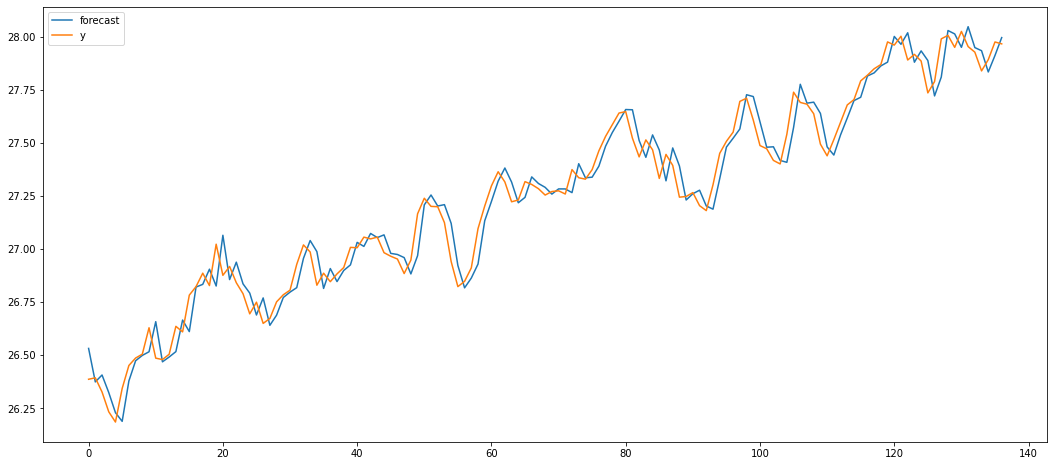

In [ ]:
#getting forecast
# Actual vs Fitted

model_fit.plot_predict(dynamic=False)
plt.show()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



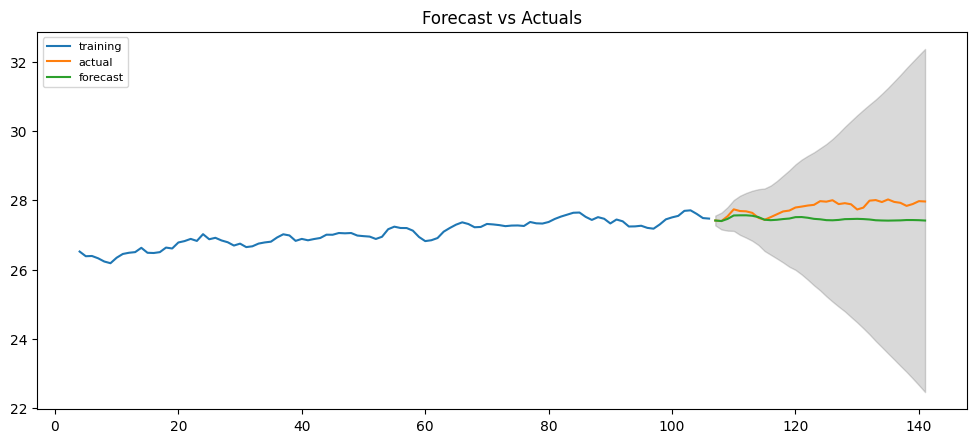

In [ ]:
#out of time cross validation
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = data['Annual_mavg'].iloc[:103]
test = data['Annual_mavg'].iloc[103:]


#now build the ARIMA model on training dataset, forecast and plot it.
model = ARIMA(train, order=(7, 2, 1))  
fitted = model.fit(disp=-1)  
# Forecast
fc, se, conf = fitted.forecast(35, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
fc_series   #721

107    27.417890
108    27.402556
109    27.464561
110    27.563547
111    27.567797
112    27.568134
113    27.554812
114    27.515729
115    27.439658
116    27.427558
117    27.439256
118    27.459968
119    27.474911
120    27.514961
121    27.517909
122    27.497286
123    27.465843
124    27.452741
125    27.428501
126    27.424209
127    27.434979
128    27.457485
129    27.460856
130    27.465645
131    27.459398
132    27.447267
133    27.425267
134    27.418449
135    27.414824
136    27.418462
137    27.421785
138    27.431780
139    27.431370
140    27.427116
141    27.417377
dtype: float64

In [ ]:
#plotting using plotly  #721
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
y=fc_series
x=[2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,
   2035,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046]

#Plotting annual temp readings- Line plot

fig_1 = px.scatter(x=x, y=y[:28],trendline='lowess')
# Edit the layout
fig_1.update_layout(title='forecasted values for Annual Temperature()',
                   xaxis_title='Years',
                   yaxis_title='Temperature (degree celsius)')
fig_1.show()

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'acf1': 0.8746432945469665,
 'corr': -0.2415009041317794,
 'mae': 0.32863466252394846,
 'mape': 0.01178035990110283,
 'me': -0.32739935864515124,
 'minmax': 0.011780343643582492,
 'mpe': -0.011735425298794015,
 'rmse': 0.3842845711132103}

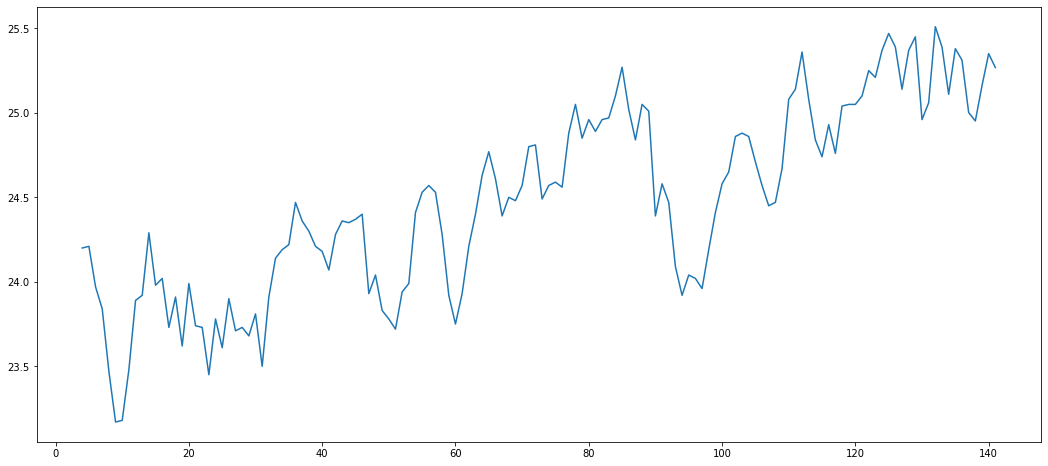

In [ ]:
#JAN-FEB
#importing for jan
jan_series=data['Jan_mavg'].values
data['Jan_mavg'].plot()



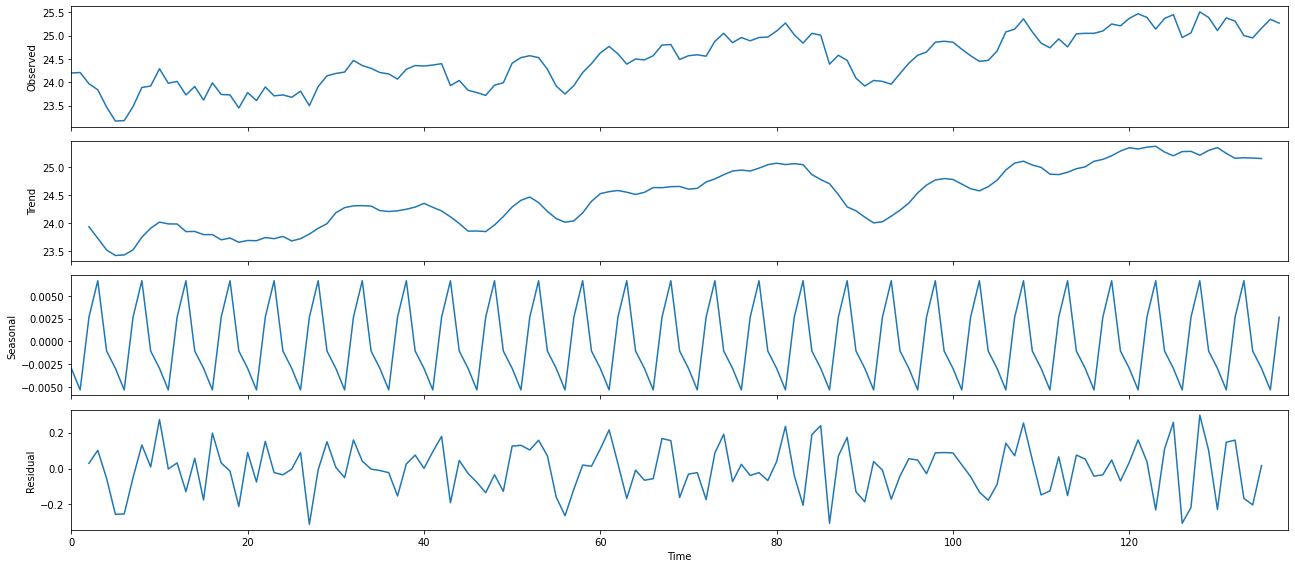

In [ ]:
# ETS Decomposition 

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition=sm.tsa.seasonal_decompose(jan_series,model='additive',freq=5)
fig =decomposition.plot()
plt.show()

In [ ]:
#parameters selection for ARIMA
import itertools 
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2],12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
#fitting arima model on annual mavg column
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(jan_series,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12- AIC:{}'.format(param, param_seasonal, results.aic))
            
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12- AIC:1267.0561904121537
ARIMA(0, 0, 0)x(0, 0, 1, 12)12- AIC:1025.5346765973159
ARIMA(0, 0, 0)x(0, 1, 0, 12)12- AIC:171.54779283162563
ARIMA(0, 0, 0)x(0, 1, 1, 12)12- AIC:149.35084174133158


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 0)x(1, 0, 0, 12)12- AIC:164.32810642003096
ARIMA(0, 0, 0)x(1, 0, 1, 12)12- AIC:97.20807375155154
ARIMA(0, 0, 0)x(1, 1, 0, 12)12- AIC:151.50740116847587
ARIMA(0, 0, 0)x(1, 1, 1, 12)12- AIC:150.39268393937095
ARIMA(0, 0, 1)x(0, 0, 0, 12)12- AIC:1078.4524640583074
ARIMA(0, 0, 1)x(0, 0, 1, 12)12- AIC:853.26252029278
ARIMA(0, 0, 1)x(0, 1, 0, 12)12- AIC:84.65942475064821
ARIMA(0, 0, 1)x(0, 1, 1, 12)12- AIC:62.438617320037416
ARIMA(0, 0, 1)x(1, 0, 0, 12)12- AIC:81.25755918080817
ARIMA(0, 0, 1)x(1, 0, 1, 12)12- AIC:24.112003442395984
ARIMA(0, 0, 1)x(1, 1, 0, 12)12- AIC:63.54210462243084
ARIMA(0, 0, 1)x(1, 1, 1, 12)12- AIC:63.4119346630293
ARIMA(0, 1, 0)x(0, 0, 0, 12)12- AIC:-35.632361279497005
ARIMA(0, 1, 0)x(0, 0, 1, 12)12- AIC:-38.3724079327895
ARIMA(0, 1, 0)x(0, 1, 0, 12)12- AIC:42.54838738142879
ARIMA(0, 1, 0)x(0, 1, 1, 12)12- AIC:-15.024753918793799
ARIMA(0, 1, 0)x(1, 0, 0, 12)12- AIC:-37.80867466148668
ARIMA(0, 1, 0)x(1, 0, 1, 12)12- AIC:-37.02258961012134
ARIMA(0, 1, 0)x(1, 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(0, 0, 1, 12)12- AIC:-34.86506519033499
ARIMA(1, 0, 1)x(0, 1, 0, 12)12- AIC:32.107330693934216
ARIMA(1, 0, 1)x(0, 1, 1, 12)12- AIC:-13.860721261235827
ARIMA(1, 0, 1)x(1, 0, 0, 12)12- AIC:-34.64996523097726


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(1, 0, 1, 12)12- AIC:-33.786834162163785
ARIMA(1, 0, 1)x(1, 1, 0, 12)12- AIC:-1.221060764136391
ARIMA(1, 0, 1)x(1, 1, 1, 12)12- AIC:-12.384714617560114
ARIMA(1, 1, 0)x(0, 0, 0, 12)12- AIC:-33.71088449249947
ARIMA(1, 1, 0)x(0, 0, 1, 12)12- AIC:-36.90719880075477
ARIMA(1, 1, 0)x(0, 1, 0, 12)12- AIC:44.42378300043548
ARIMA(1, 1, 0)x(0, 1, 1, 12)12- AIC:-12.644792849364244
ARIMA(1, 1, 0)x(1, 0, 0, 12)12- AIC:-36.96750040874178
ARIMA(1, 1, 0)x(1, 0, 1, 12)12- AIC:-35.463611901141675
ARIMA(1, 1, 0)x(1, 1, 0, 12)12- AIC:8.832328580941478
ARIMA(1, 1, 0)x(1, 1, 1, 12)12- AIC:-10.194968650816122
ARIMA(1, 1, 1)x(0, 0, 0, 12)12- AIC:-43.046913108942405
ARIMA(1, 1, 1)x(0, 0, 1, 12)12- AIC:-52.297283152924884
ARIMA(1, 1, 1)x(0, 1, 0, 12)12- AIC:40.573874158847865
ARIMA(1, 1, 1)x(0, 1, 1, 12)12- AIC:-18.150375851099742
ARIMA(1, 1, 1)x(1, 0, 0, 12)12- AIC:-53.036977205732164
ARIMA(1, 1, 1)x(1, 0, 1, 12)12- AIC:-50.448663357616354
ARIMA(1, 1, 1)x(1, 1, 0, 12)12- AIC:9.122711957638113
ARI

In [ ]:
pip install statsmodels

In [ ]:
#model for JAN 
# fit an ARIMA model and plot residual errors
import statsmodels
from pandas import read_csv
from patsy import dmatrices
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

model = ARIMA(jan_series, order=(5,2,1))
result = model.fit()
# summary of fit model
print(result.summary())


                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  136
Model:                 ARIMA(5, 2, 1)   Log Likelihood                  45.203
Method:                       css-mle   S.D. of innovations              0.168
Date:                Sat, 27 Feb 2021   AIC                            -74.407
Time:                        07:08:51   BIC                            -51.105
Sample:                             2   HQIC                           -64.938
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.842e-05      0.000      0.216      0.829      -0.000       0.000
ar.L1.D2.y     0.0067      0.068      0.099      0.922      -0.127       0.140
ar.L2.D2.y    -0.0438      0.068     -0.640      0.5

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



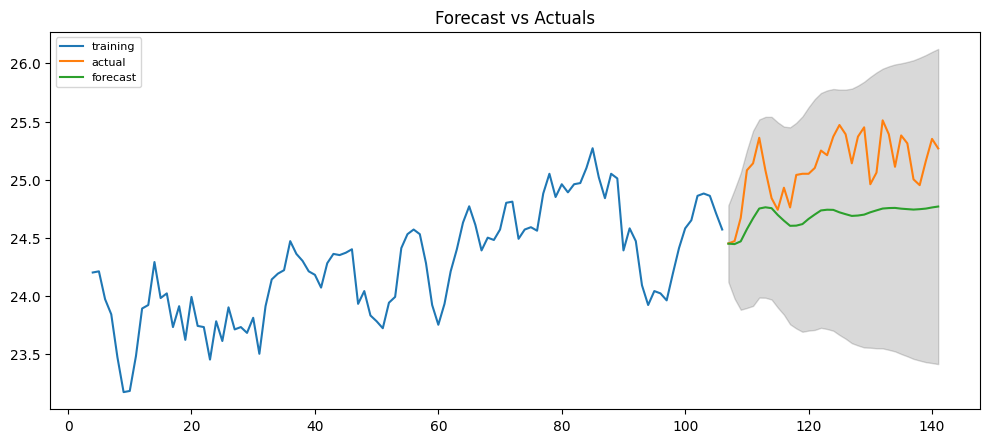

In [ ]:
#out of time cross validation
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = data['Jan_mavg'].iloc[:103]
test = data['Jan_mavg'].iloc[103:]


#now build the ARIMA model on training dataset, forecast and plot it.
model = ARIMA(train, order=(5, 2, 1))  
fitted = model.fit(disp=-1)  
# Forecast
fc, se, conf = fitted.forecast(35, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
#plotting using plotly  #521
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
y=fc_series
x=[2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,
   2035,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046]

#Plotting annual temp readings- Line plot

fig_2 = px.scatter(x=x, y=y[:28],trendline='lowess')
# Edit the layout
fig_1.update_layout(title='forecasted values for JAN-FEB Temperature()',
                   xaxis_title='Years',
                   yaxis_title='Temperature (degree celsius)')
fig_2.show()

In [ ]:
# evaluate forecasts
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'acf1': 0.8350917909665718,
 'corr': 0.6821888128386941,
 'mae': 0.23762389330170128,
 'mape': 0.00852287190921454,
 'me': -0.22286853216098998,
 'minmax': 0.008521829765743005,
 'mpe': -0.007985773584319952,
 'rmse': 0.26928798390924985}

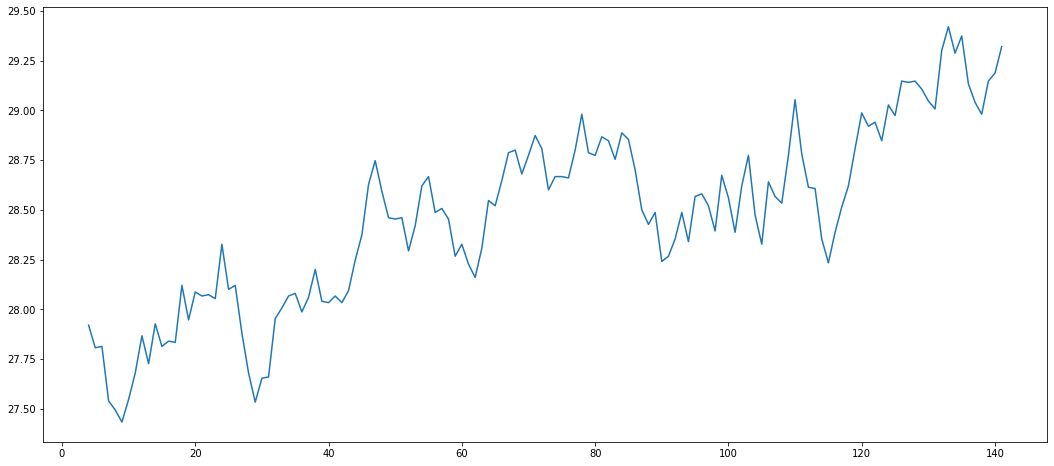

In [ ]:
#MARCH-MAY
march_series=data['Mar_mavg'].values
data['Mar_mavg'].plot()


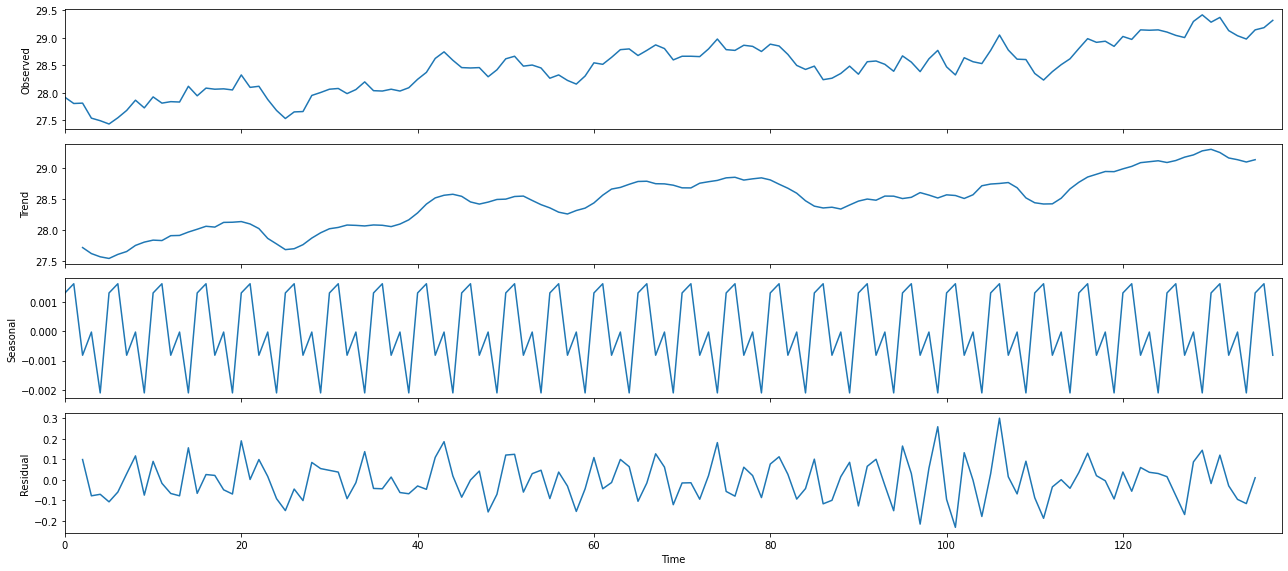

In [ ]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
march_series=data['Mar_mavg'].values
decomposition =sm.tsa.seasonal_decompose(march_series, model='additive',freq=5)
fig = decomposition.plot()
plt.show()

In [ ]:
#model for march-may
# fit an ARIMA model and plot residual errors
import statsmodels
from pandas import read_csv
from patsy import dmatrices
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

# fit model
model = ARIMA(march_series, order=(5,2,2))
result = model.fit()
# summary of fit model
print(result.summary())


                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  136
Model:                 ARIMA(5, 2, 2)   Log Likelihood                  95.768
Method:                       css-mle   S.D. of innovations              0.116
Date:                Sat, 27 Feb 2021   AIC                           -173.536
Time:                        08:05:59   BIC                           -147.322
Sample:                             2   HQIC                          -162.883
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.465e-05      0.000      0.144      0.885      -0.000       0.000
ar.L1.D2.y    -0.0397      0.118     -0.337      0.737      -0.271       0.191
ar.L2.D2.y    -0.0767      0.069     -1.106      0.2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



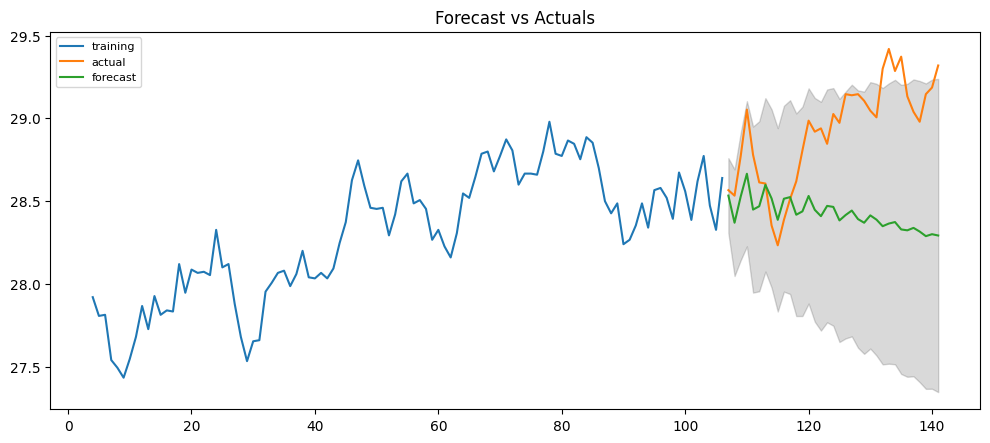

In [ ]:
#out of time cross validation
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = data['Mar_mavg'].iloc[:103]
test = data['Mar_mavg'].iloc[103:]


#now build the ARIMA model on training dataset, forecast and plot it.
model = ARIMA(train, order=(5, 2, 1))  
fitted = model.fit(disp=-1)  
# Forecast
fc, se, conf = fitted.forecast(35, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
#plotting using plotly  #521
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
y=fc_series
x=[2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,
   2035,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046]

#Plotting annual temp readings- Line plot

fig_3 = px.scatter(x=x, y=y[:28],trendline='lowess')
# Edit the layout
fig_3.update_layout(title='forecasted values for March-May Temperature',
                   xaxis_title='Years',
                   yaxis_title='Temperature (degree celsius)')
fig_3.show()

In [ ]:
# evaluate forecasts
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'acf1': 0.8745373022674245,
 'corr': -0.5140640741171221,
 'mae': 0.5257687856318348,
 'mape': 0.018073340163452675,
 'me': -0.49967811163888,
 'minmax': 0.01807096951413678,
 'mpe': -0.01715225378176968,
 'rmse': 0.6128899457971622}

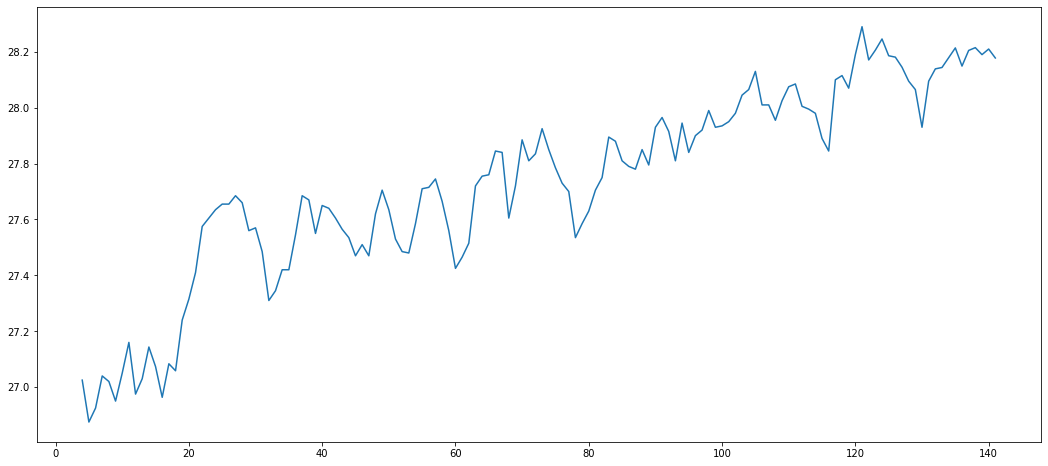

In [ ]:
#JUNE-SEPT PREDICTIONS
june_series=data['Jun_mavg'].values
data['Jun_mavg'].plot()


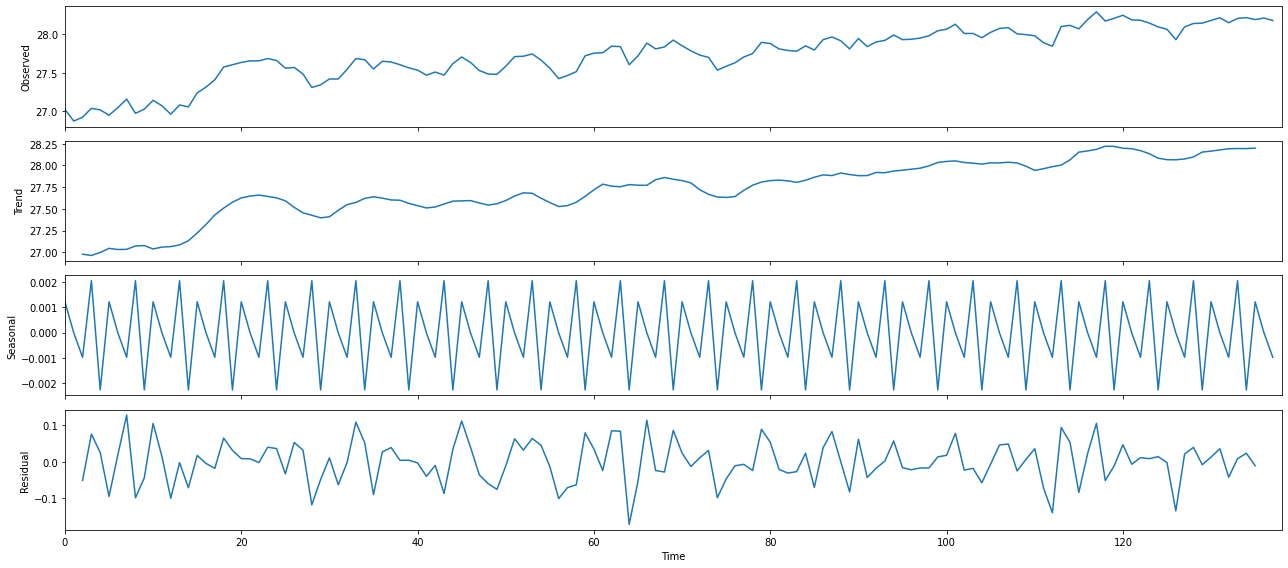

In [ ]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
june_series=data['Jun_mavg'].values
decomposition =sm.tsa.seasonal_decompose(june_series, model='additive',freq=5)
fig = decomposition.plot()
plt.show()

In [ ]:
#model for march-may
# fit an ARIMA model and plot residual errors
import statsmodels
from pandas import read_csv
from patsy import dmatrices
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

# fit model
model = ARIMA(june_series, order=(5,2,1))
result = model.fit()
# summary of fit model
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  136
Model:                 ARIMA(5, 2, 1)   Log Likelihood                 154.892
Method:                       css-mle   S.D. of innovations              0.076
Date:                Sat, 27 Feb 2021   AIC                           -293.785
Time:                        07:31:15   BIC                           -270.484
Sample:                             2   HQIC                          -284.316
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.941      0.348      -0.000       0.000
ar.L1.D2.y    -0.0120      0.078     -0.155      0.877      -0.164       0.140
ar.L2.D2.y    -0.1357      0.077     -1.760      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



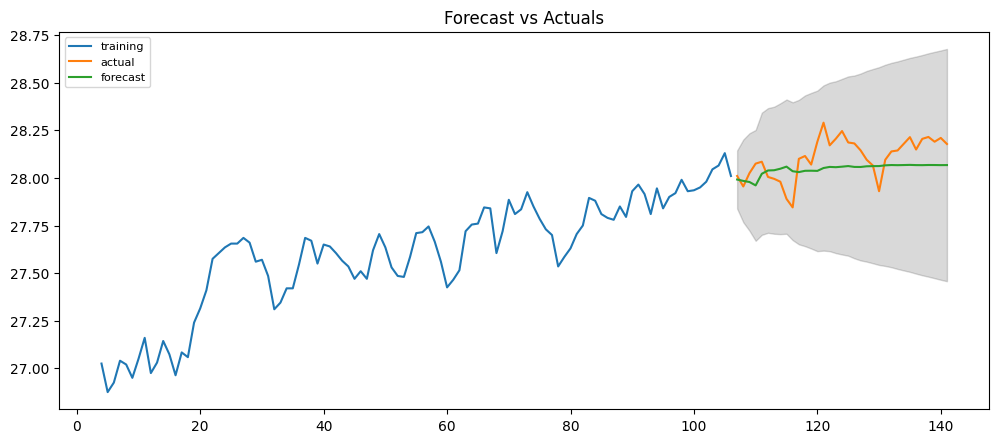

In [ ]:
#out of time cross validation
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = data['Jun_mavg'].iloc[:103]
test = data['Jun_mavg'].iloc[103:]


#now build the ARIMA model on training dataset, forecast and plot it.
model = ARIMA(train, order=(5, 2, 1))  
fitted = model.fit(disp=-1)  
# Forecast
fc, se, conf = fitted.forecast(35, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
#plotting using plotly  #521
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
y=fc_series
x=[2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,
   2035,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046]

#Plotting annual temp readings- Line plot

fig_4 = px.scatter(x=x, y=y[:28],trendline='lowess')
# Edit the layout
fig_4.update_layout(title='forecasted values for JUNE-SEPT Temperature()',
                   xaxis_title='Years',
                   yaxis_title='Temperature (degree celsius)')
fig_4.show()

In [ ]:
# evaluate forecasts
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'acf1': 0.6625679290870549,
 'corr': 0.4312525498730749,
 'mae': 0.09948347912387874,
 'mape': 0.0035367450777698344,
 'me': -0.06131839584231601,
 'minmax': 0.0035334250675903567,
 'mpe': -0.0021693103444550854,
 'rmse': 0.11375760815277244}

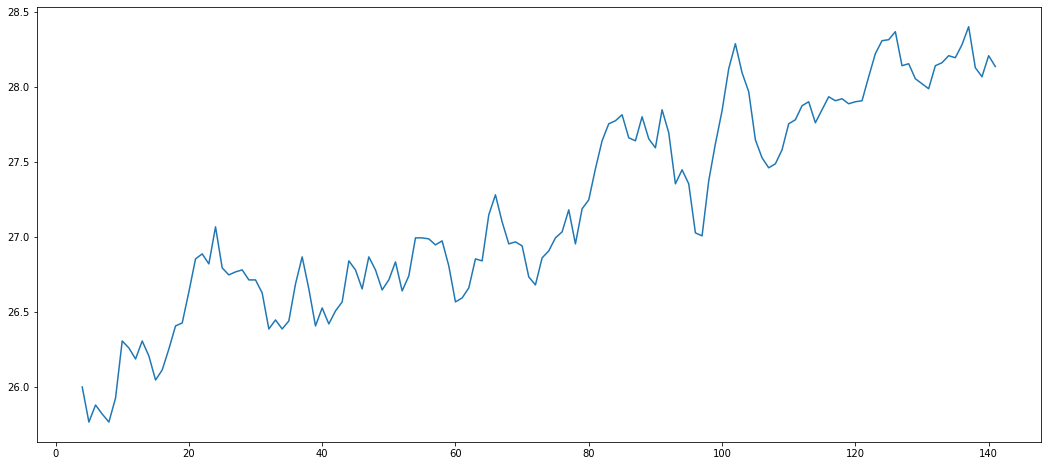

In [ ]:
#OCT-DEC PREDICTIONS
oct_series=data['Oct_mavg'].values
data['Oct_mavg'].plot()

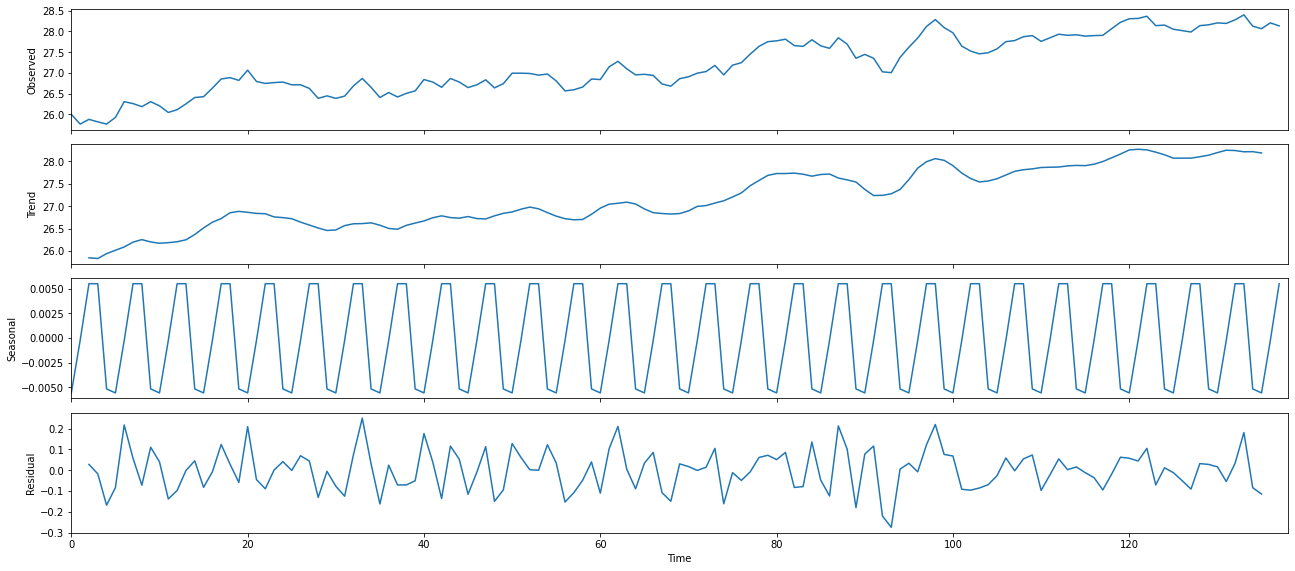

In [ ]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
oct_series=data['Oct_mavg'].values
decomposition =sm.tsa.seasonal_decompose(oct_series, model='additive',freq=5)
fig = decomposition.plot()
plt.show()

In [ ]:
#model for oct-dec
# fit an ARIMA model and plot residual errors
import statsmodels
from pandas import read_csv
from patsy import dmatrices
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

# fit model
model = ARIMA(oct_series, order=(5,2,1))
result = model.fit()
# summary of fit model
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  136
Model:                 ARIMA(5, 2, 1)   Log Likelihood                  86.835
Method:                       css-mle   S.D. of innovations              0.124
Date:                Sat, 27 Feb 2021   AIC                           -157.669
Time:                        08:01:24   BIC                           -134.368
Sample:                             2   HQIC                          -148.200
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.932e-05      0.000     -0.348      0.728      -0.000       0.000
ar.L1.D2.y     0.1256      0.074      1.696      0.092      -0.020       0.271
ar.L2.D2.y    -0.0911      0.075     -1.220      0.2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



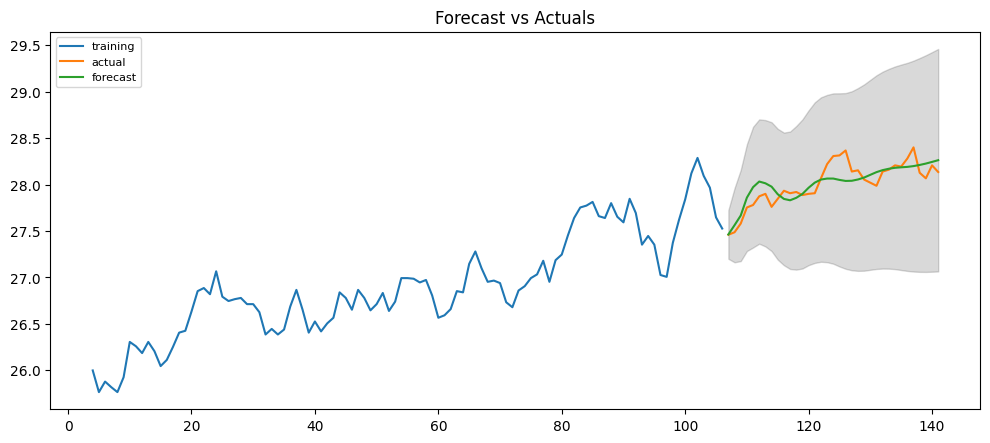

In [ ]:
#out of time cross validation
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = data['Oct_mavg'].iloc[:103]
test = data['Oct_mavg'].iloc[103:]


#now build the ARIMA model on training dataset, forecast and plot it.
model = ARIMA(train, order=(5, 2, 1))  
fitted = model.fit(disp=-1)  
# Forecast
fc, se, conf = fitted.forecast(35, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
#plotting using plotly  #521
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
y=fc_series
x=[2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,
   2035,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046]

#Plotting annual temp readings- Line plot

fig_5 = px.scatter(x=x, y=y[:28],trendline='lowess')
# Edit the layout
fig_5.update_layout(title='forecasted values for OCT-DEC Temperature()',
                   xaxis_title='Years',
                   yaxis_title='Temperature (degree celsius)')
fig_5.show()

In [ ]:
# evaluate forecasts
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'acf1': 0.6855144110996123,
 'corr': 0.8268709339091787,
 'mae': 0.10379754862316933,
 'mape': 0.0036989179724732503,
 'me': 0.0036583115354427978,
 'minmax': 0.003689921325245038,
 'mpe': 0.00015390904015119515,
 'rmse': 0.13009749921160044}